# Lab Definition 

### Objective:
In this lab, you will load the dataset, use Lasso Regression to select the best features, and then use Ridge Regression to model the dataset.  
You are free to select a number of features in the range (10 - 170)

### Tasks:
1. Load the dataset (data.csv) and check out the features.
2. Separate the features from the labels(target), and split the dataset into training and testing sets.
3. Use Lasso Regression to select the best features.
4. Use Ridge Regression to model the dataset.
5. Calculate the RMSE and R2 Score of the model.
6. Plot the line of best fit (Based on the testing set.  This step is optional).

In [19]:
# imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.model_selection import train_test_split as tst, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [20]:
# loading and displaying the dataset
data = pd.read_csv('data.csv')
data.sample(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X192,X193,X194,X195,X196,X197,X198,X199,X200,y
771,1.008179,1.103460,1.045000,-0.351278,1.682607,1.785223,-0.819966,0.468915,-0.257249,0.690185,...,1.339198,1.428217,0.223456,-0.331116,0.017437,-0.254567,0.529655,0.640075,0.414251,114.688424
1273,-0.307818,-0.030326,0.295731,1.723545,0.589528,-1.188418,-1.039689,-1.113713,1.169727,0.682944,...,0.022465,-2.450870,0.882115,-1.635821,-1.129945,-0.314807,-0.312004,-0.530934,-0.914556,77.401886
891,-1.688306,0.636366,-0.621450,1.765906,-1.040306,-0.433015,0.618081,-0.612790,0.256578,-2.698107,...,-1.072994,-0.053546,0.056480,0.464432,0.877264,-0.318044,-0.922790,-0.845484,0.573820,401.777846
1247,1.763005,-0.017871,1.526122,0.870409,0.201375,2.138184,-0.368612,2.255873,-1.593086,-0.504184,...,0.296236,0.633052,0.067615,1.318363,0.900413,-0.759184,-0.415444,1.185575,-1.207552,413.040539
396,1.902556,-1.165962,-0.701192,-0.321855,0.622111,0.891963,-0.954384,0.939107,-1.025509,1.435988,...,-1.188299,-0.598076,0.609035,-0.911695,-1.685305,-0.301709,-0.997553,0.031714,-0.419848,230.457603
1382,1.100198,-0.030772,0.503624,0.023233,1.046124,0.169681,-0.489795,-0.514119,-0.199389,0.487630,...,0.776544,-0.650001,0.079518,0.563972,0.403602,0.551592,0.076638,0.597330,0.146872,-37.022933
24,0.697816,2.137399,0.238704,-0.233695,-0.094565,0.803350,0.249631,0.623786,-0.136723,-1.222657,...,1.357644,2.169221,-0.741796,-0.461804,0.238093,-1.578300,1.026252,0.499199,-1.874381,155.051746
708,0.127012,-0.919564,-0.664770,-0.416491,-0.653404,-1.068977,-0.187935,-0.374276,-0.957756,-0.329222,...,1.588892,0.435632,-2.478228,-1.274872,0.697027,-0.744416,-0.775532,0.194238,0.029637,162.238945
36,-0.404691,-0.150729,-0.619197,0.463101,1.200909,1.445200,-1.846554,-0.078450,0.423379,-1.465921,...,-0.402241,2.139750,-1.361925,-0.891883,-1.610931,1.308528,0.426036,0.483941,-0.934586,21.651225
542,-1.447579,-1.283626,-0.424259,-1.050171,1.420849,-0.930568,0.229979,-1.227578,0.715096,-0.922480,...,-0.179156,0.034700,0.574969,0.205064,-0.407653,-0.111363,0.059338,-0.124919,1.044087,-111.562233


In [21]:
# taking the y column as the target and dropping it from the features 

y = data['y']
x = data.drop(columns=['y'])

print(x.shape,y.shape)

(1500, 200) (1500,)


In [22]:
# splitting the dataset into training and testing  

x_train,x_test,y_train,y_test = tst(x,y,test_size=0.3, shuffle=True)

Using Lasso Regression to select best features

In [23]:
# defining the alpha hyper parameter as a grid object to get the best alpha to use without overfitting or making the model too sparse

alpha = {'alpha': [0.001,0.01,0.1,1]}

In [24]:
# creating and trainning the lasso model with an alpha hyperparam that is fine tuned using GridSearch

lasso = Lasso()

grid_search = GridSearchCV(lasso, alpha,cv=5)  # 5-fold cross-validation
grid_search.fit(x_train, y_train) 

lasso.fit(x_train,y_train)

Lasso()

In [25]:
# getting the best model and fitting it to the trainning data

model = grid_search.best_estimator_
model.fit(x_train,y_train)

# we also get the best alpha value for display later 
best_alpha = grid_search.best_params_['alpha']

In [26]:
# checking L1 perfomance

y_predicted = model.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)

print(f'Achieved a Mean Squared Error of {round(mse,4)} with an Alpha value of {best_alpha}')

Achieved a Mean Squared Error of 0.0109 with an Alpha value of 0.01


In [27]:
# in L1 regularization, the features that have not been reduced to 0 are the ones selected, therefore we can select all the columns from the original dataset where the result in the lasso regularization is not 0

print(lasso.coef_)

[-0.         -0.          0.          0.         -0.         86.96461064
 -0.          0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         26.80919126 -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.          2.33716771  0.          0.
 -0.          0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.          0.          0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         88.33157017 -0.         -0.
  0.          0.          0.          0.         -0.         -0.
  0.         -0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
 34.89875064 -0. 

In [28]:
# we can see that the coefficients have been reduced but some remain to be above 0, those are our selected coloumns

features = x.columns[lasso.coef_ > 0]
print(features)

Index(['X6', 'X17', 'X28', 'X52', 'X91', 'X113', 'X144', 'X161', 'X166',
       'X181'],
      dtype='object')


Modelling the dataset using the selected Features and Ridge regression

In [29]:
# dropping all features of the dataset that were not selected by L1 Regularization 
# we expect it to have the same number of columns as the size of the selected features array

new_x = x.loc[:,x.columns.isin(features)]
print(new_x.shape)


(1500, 10)


In [30]:
# splitting the data into train and test splits 

x_features_train,x_features_test,y_ridge_train,y_ridge_test = tst(new_x,y,test_size=0.3, random_state=3)

In [31]:
# applying ridge regression with 5 fold Cross Validation Sets

ridge = Ridge()
alpha = {'alpha':[0.01,0.1,1]}

grid = GridSearchCV(ridge,alpha,cv=5)
grid.fit(x_features_train,y_ridge_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1]})

In [32]:
# getting the best model 

best_model = grid.best_estimator_
r_c = best_model.intercept_

In [33]:
# checking performance

y_ridge_predicted = best_model.predict(x_features_test)
ridge_mse = mean_squared_error(y_ridge_test, y_ridge_predicted)
r2 = r2_score(y_ridge_test,y_ridge_predicted)

# root mean square is got as the MSE ^ 1/2 as we were not allowed to use the math library

print(f'Achieved a Root Mean Squared Error (RMSE) of {round((ridge_mse**(0.5)),4)} and a Coefficient of Determination (R2) score of {r2}')

Achieved a Root Mean Squared Error (RMSE) of 0.0993 and a Coefficient of Determination (R2) score of 0.9999997084855096


### Plotting a line of best fit 

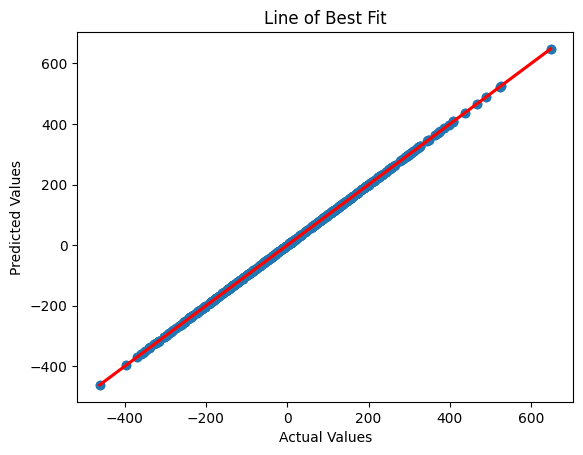

In [34]:
plt.scatter(y_ridge_test,y_ridge_predicted)
sns.regplot(x=y_ridge_test,y=y_ridge_predicted,line_kws={'color':'red'})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Line of Best Fit")

plt.show()